# Ex2 - Getting and Knowing your Data

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv("chipotle.tsv",delimiter='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [4]:
# Solution 1
chipo.shape


(4622, 5)

In [5]:
# Solution 2

print("Number of observations : ",chipo.shape[0])

Number of observations :  4622


### Step 6. What is the number of columns in the dataset?

In [6]:
print("Number of Columns : ",chipo.shape[1])

Number of Columns :  5


### Step 7. Print the name of all the columns.

In [7]:
print(*[x for x in chipo.columns],sep=" , ") 

order_id , quantity , item_name , choice_description , item_price


### Step 8. How is the dataset indexed?

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [9]:
print(*[x for x in chipo["item_name"].mode()])

Chicken Bowl


### Step 10. For the most-ordered item, how many items were ordered?

In [10]:
print(sum([x for x in chipo[chipo['item_name'] == 'Chicken Bowl']['quantity']]))


761


### Step 11. What was the most ordered item in the choice_description column?

In [11]:
# %%timeit
items = {}
l = [x for x in chipo['choice_description']]
for x in l:
    if type(x) != type(0.1):
        for CommaSplitted in x.split(','):
            for BracketStripped in CommaSplitted.split('['):
                for i in BracketStripped.split(']'):
                    i = i.strip()
                    if(i not in ('',' ','  ')):
                        if i in items:
                            items[i]+=1
                        else:
                            items[i] = 1
max = 0
M = ""
for i,j in items.items():
    if(j >max):
        max = j
        M=i
print(M,max)

Rice 2389


### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [12]:
chipo['item_price'] = chipo['item_price'].str.replace('$',"").astype(float)
print(chipo.dtypes)

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


#### Step 13.b. Create a lambda function and change the type of item price

In [13]:
# Reset DataFrame
chipo = pd.read_csv("chipotle.tsv",delimiter='\t')

In [27]:
chipo['something'] = chipo['item_price'].apply(lambda val: float(str(val).replace('$','')))


In [28]:
chipo

,order_id,quantity,item_name,choice_description,item_price,something
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


#### Step 13.c. Check the item price type

In [15]:
print(chipo['item_price'].dtypes)

float64


### Step 14. How much was the revenue for the period in the dataset?

In [16]:
print(chipo['item_price'].sum())

34500.16


### Step 15. How many orders were made in the period?

In [17]:
print(chipo['order_id'].count())

4622


### Step 16. What is the average revenue amount per order?

In [18]:
# Solution 1

Revenue = chipo['item_price'].sum()
Orders = chipo['order_id'].count()
AverageRevenue = Revenue/Orders
print("Average Revenue is : $",AverageRevenue)

Average Revenue is : $ 7.464335785374297


In [19]:
# Solution 2

print("Average Revenue is : $",chipo['item_price'].mean())

Average Revenue is : $ 7.464335785374297


### Step 17. How many different items are sold?

In [20]:
print("The number of Different Items = ", len(chipo['item_name'].unique()))

The number of Different Items =  50


### ||-> Continuation => 15_02_2024

In [21]:
a= chipo['item_name'].squeeze()
print(a)
print(type(a))


0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object
<class 'pandas.core.series.Series'>


a    1
b    2
c    3
d    4
dtype: int64
<class 'pandas.core.series.Series'>
2
2.5
(4,)
a    1
b    2
c    3
d    4
dtype: int64
b    2
c    3
d    4
dtype: int64


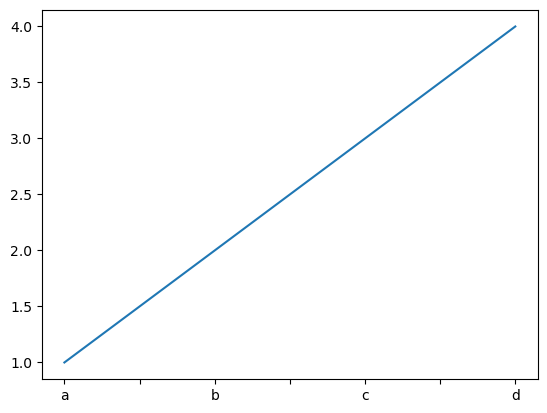

In [22]:
MyDict = {'a':1,'b':2,'c':3,'d':4}
import matplotlib.pyplot as plt
a = pd.Series(MyDict)
print(a)
print(type(a))
print(a['b'])
print(a.mean())
print(a.shape)
print(a.head())
print(a['b':'d'])
a.plot()
plt.show()

#### Aggressions

In [23]:
data = {
    "name":['sally','mary','john','Hari'],
    "age" : [50,40,30,30]
}
df = pd.DataFrame(data)
print(df.query('age > 30'))

    name  age
0  sally   50
1   mary   40


In [24]:
data = {
    "name":['sally','mary','john','Hari','lalith','Selva Akash','Hariesh','Ananya','Anjana','Lithikha','Harini'],
    "age" : [50,40,30,30,17,17,18,18,45,19,122]
}
df = pd.DataFrame(data)
print(df.query('age > 30 or age <  18'))

           name  age
0         sally   50
1          mary   40
4        lalith   17
5   Selva Akash   17
8        Anjana   45
10       Harini  122


In [25]:
data = {
    "name":['sally','mary','john','Hari','Lalith','Selva Akash','Hariesh','Ananya','Anjana','Lithikha','Harini'],
    "age" : [50,40,30,30,17,17,18,18,45,19,122],
    "salary":[10122,14245,2342,3513,41,24,235,23525,1234,125,235],
    "job" : ['Artist','Artist','Artist','Gamer','CEO','IDK','BodyBuilder','Eater','Singer','Joker','who are you?']
}
df = pd.DataFrame(data)
print(df.query('(age > 30 or age <  18) & salary>=1000'))

     name  age  salary     job
0   sally   50   10122  Artist
1    mary   40   14245  Artist
8  Anjana   45    1234  Singer
